In [1]:
import os, sys, time, resource, re, gc, shutil
from multiprocess import Pool
from functools import partial
from tabulate import tabulate
from urllib.parse import urlparse, parse_qsl

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mongoengine.queryset.visitor import Q
import django
from django.db.models import Count
sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *
from django.db.models import F

In [2]:
runs = RunStats.objects.filter(
    query=365,
    limit=0,
    method = 'NM',
    min_freq=5
).annotate(
    topics = models.Count('topic'),
)
df =  pd.DataFrame.from_dict(list(runs.values()))

In [3]:
df.head()

,K,alpha,batch_count,db,db_time,docs_seen,dthreshold,empty_topics,error,errortype,...,query_id,run_id,start,status,term_count,tfidf_time,topic_scores_current,topic_titles_current,topic_year_scores_current,topics
0,200,0.05,0,False,0.0,0.0,0.0005,0.0,440.953897,Frobenius,...,365,403,2017-11-16 10:23:27.117543+00:00,3,0.0,1466.414633,True,True,True,0
1,60,0.05,0,False,0.0,0.0,0.0005,0.0,466.100626,Frobenius,...,365,396,2017-11-16 09:13:07.089067+00:00,3,0.0,1357.179166,True,True,True,0
2,140,0.05,0,False,0.0,0.0,0.0005,0.0,448.148905,Frobenius,...,365,393,2017-11-15 16:23:08.249634+00:00,3,0.0,1327.255004,True,True,True,0
3,190,0.05,0,False,0.0,0.0,0.0005,0.0,442.083139,Frobenius,...,365,402,2017-11-16 10:14:15.591519+00:00,3,0.0,1466.946705,True,True,True,0
4,50,0.05,0,False,0.0,0.0,0.0005,0.0,469.053382,Frobenius,...,365,395,2017-11-16 09:13:07.007283+00:00,3,0.0,1319.877243,True,True,True,0


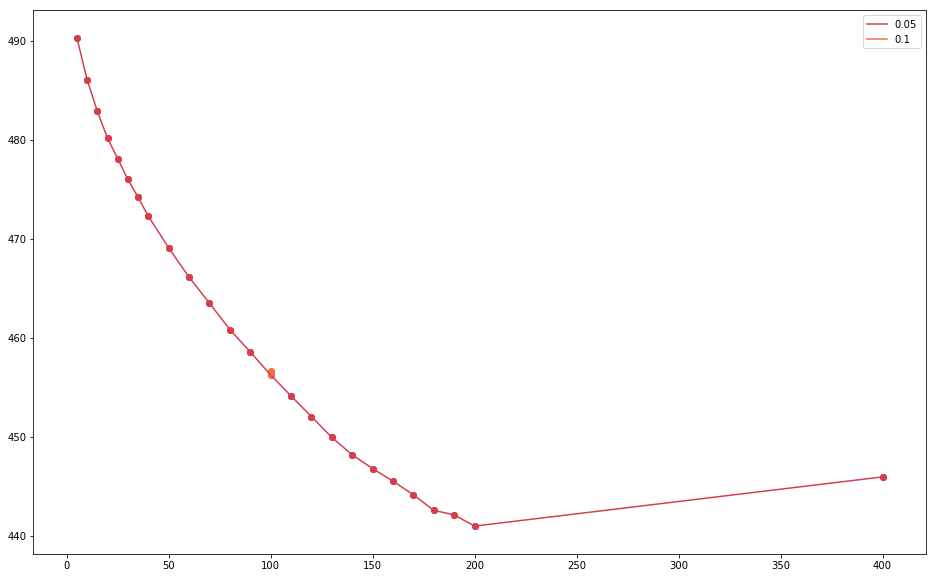

In [4]:
ndf = df.sort_values(by='topics', ascending=1).reset_index(drop=True)

colorset=["#d53e4f","#f46d43","#fdae61","#fee08b","#e6f598","#abdda4","#66c2a5","#3288bd"]
plt.rcParams["figure.figsize"] = [16,10]
gndf = ndf.groupby(['alpha'])
ps = []
gs = []
i = 0
for name,group in gndf:
    #if name == 0.1:
     #   continue
    group = group.sort_values('K')
   # group = group[(group['K'] > 90) & (group['K'] < 150)]
    p = plt.plot(group['K'],group['error'],color=colorset[i])
    plt.scatter(group['K'],group['error'],color=colorset[i])
    plt.scatter(group['K'],group['error']+group['empty_topics']*5,color=colorset[i])
    #m = group[group['topics']==150]
   # plt.text(
   #     m['topics'],
   #     m['error'],name
   # )
    ps.append(p[0])
    gs.append(name)
    i+=1
#p1 = plt.plot(ndf['topics'],ndf[ndf[max_features==5000]]['error'],color='#fbb4ae')
#p2 = plt.plot(ndf['topics'],ndf['iterations'],color='#b3cde3')
plt.legend((ps),(gs))

plt.show()